In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
from model_utils.models import *
from sklearn.model_selection import train_test_split
from model_utils.models import *
X,y=load_reshaped_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape

((90, 4), (90,))

In [2]:
labels = os.listdir("train")

In [3]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

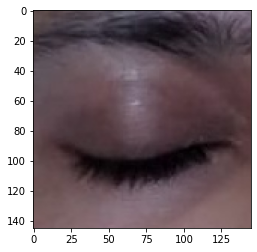

In [4]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("train/Closed/_0.jpg"))

In [5]:
a = plt.imread("train/yawn/10.jpg")

In [6]:
a.shape

(480, 640, 3)

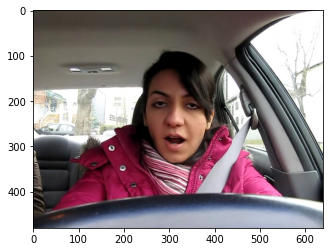

In [7]:
plt.imshow(plt.imread("train/yawn/10.jpg"))

In [8]:
def face_for_yawn(direc="train", face_cas_path="haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


#yawn_no_yawn = face_for_yawn()

In [9]:
def get_data(dir_path="train/", face_cas="haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data
#data_train = get_data()

In [10]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [11]:
new_data = append_data()

0
1
2
3


c:\users\sridhar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [12]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [13]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [14]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [15]:
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [17]:
len(X_test)

577

In [18]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

c:\users\sridhar\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sridhar\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sridhar\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\srid

In [19]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [20]:
from sklearn.model_selection import train_test_split
from model_utils.models import *
X,y=load_reshaped_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape

((90, 4), (90,))

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score
ac=[]
algorithm2=svm.SVC()
algorithm2.fit(X_train,y_train); 

ac.append(accuracy_score(y_train, algorithm2.predict(X_train))*100)
print(ac)

[97.77777777777777]


In [46]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
ac.append(model_accuracy(test_size,random_state)*100)

print(ac)

[97.77777777777777, 97.77777777777777, 0.9120199999999999, 91.202, 93.5, 92.7745, 92.7745]


In [38]:
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2
import os
import pyttsx3

engine = pyttsx3.init()
def alarm(msg):
    global alarm_status
    global alarm_status2
    global saying

    while alarm_status:
        print('call')
        s = 'espeak "'+msg+'"'
        engine.say("Please wake up sir")
        engine.runAndWait()
        engine.stop()

    if alarm_status2:
        print('call')
        saying = True
        s = 'espeak "' + msg + '"'
        os.system(s)
        saying = False

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    C = dist.euclidean(eye[0], eye[3])

    ear = (A + B) / (2.0 * C)

    return ear

def final_ear(shape):
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]

    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)

    ear = (leftEAR + rightEAR) / 2.0
    return (ear, leftEye, rightEye)

def lip_distance(shape):
    top_lip = shape[50:53]
    top_lip = np.concatenate((top_lip, shape[61:64]))

    low_lip = shape[56:59]
    low_lip = np.concatenate((low_lip, shape[65:68]))

    top_mean = np.mean(top_lip, axis=0)
    low_mean = np.mean(low_lip, axis=0)

    distance = abs(top_mean[1] - low_mean[1])
    return distance




EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 30
YAWN_THRESH = 20
alarm_status = False
alarm_status2 = False
saying = False
COUNTER = 0

print("-> Loading the predictor and detector...")
#detector = dlib.get_frontal_face_detector()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")    
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


print("-> Starting Video Stream")
vs = VideoStream(0).start()
#vs= VideoStream(usePiCamera=True).start()     
time.sleep(1.0)

while True:

    frame = vs.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #rects = detector(gray, 0)
    rects = detector.detectMultiScale(gray, scaleFactor=1.1,minNeighbors=5, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)

    #for rect in rects:
    for (x, y, w, h) in rects:
        rect = dlib.rectangle(int(x), int(y), int(x + w),int(y + h))
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        eye = final_ear(shape)
        ear = eye[0]
        leftEye = eye [1]
        rightEye = eye[2]

        distance = lip_distance(shape)

        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        lip = shape[48:60]
        cv2.drawContours(frame, [lip], -1, (0, 255, 0), 1)

        if ear < EYE_AR_THRESH:
            COUNTER += 1

            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                if alarm_status == False:
                    alarm_status = True
                    t = Thread(target=alarm, args=('wake up sir',))
                    t.deamon = True
                    t.start()

                cv2.putText(frame, "Sleep Alert!", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        else:
            COUNTER = 0
            alarm_status = False

        if (distance > YAWN_THRESH):
                cv2.putText(frame, "Yawn Alert", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                if alarm_status2 == False and saying == False:
                    alarm_status2 = True
                    t = Thread(target=alarm, args=('take some fresh air sir',))
                    t.deamon = True
                    t.start()
        else:
            alarm_status2 = False

        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "YAWN: {:.2f}".format(distance), (300, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        cv2.destroyAllWindows()
        vs.stop()
        break



-> Loading the predictor and detector...
-> Starting Video Stream
call
call


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['SVM','Decision Tree']

ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print(ac)
ax.set_ylim(80,100)